In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [63]:
#Gerade
def line(x, a, b):
    return a + x * b

In [64]:
#Daten einlesen
with open('Messung6-1-1_7mm.txt') as data:
    z7mm = np.loadtxt(data, usecols= 0)
with open('Messung6-1-1_7mm.txt') as data:
    dobj7mm = 1E06*np.loadtxt(data, usecols= 1)

with open('Messung6-1-1-7_5mm.txt') as data:
    z7_5mm = np.loadtxt(data, usecols= 0)
with open('Messung6-1-1-7_5mm.txt') as data:
    dobj7_5mm = 1E06*np.loadtxt(data, usecols= 1)

with open('Messung6-1-1_8mm.txt') as data:
    z8mm = np.loadtxt(data, usecols= 0)
with open('Messung6-1-1_8mm.txt') as data:
    dobj8mm = 1E06*np.loadtxt(data, usecols= 1)

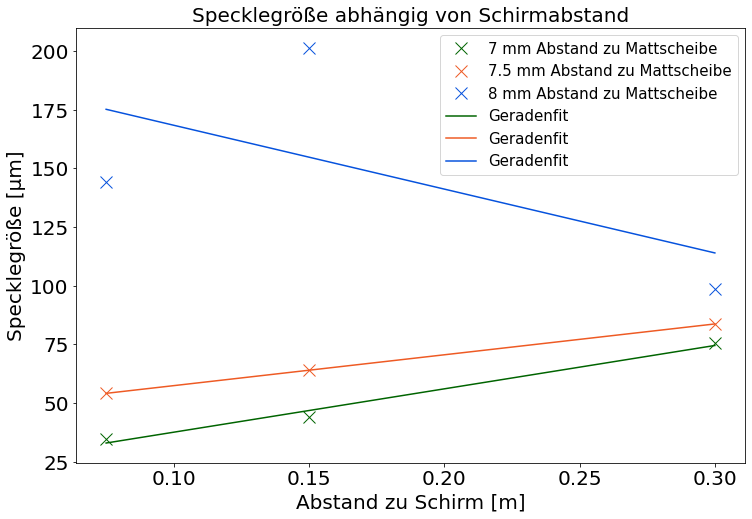

In [65]:
#Plotten der Messdaten
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)
fig, ax = plt.subplots(figsize=(12,8))
#ax.set_xlim(30, 230)
ax.set_xlabel('Abstand zu Schirm [m]', fontsize=20)
ax.set_ylabel('Specklegröße [\u03bcm]', fontsize=20)


#Plot
ax.plot(z7mm, dobj7mm, 'x',markersize=12, color = "darkgreen",label = "7 mm Abstand zu Mattscheibe")
ax.plot(z7_5mm, dobj7_5mm, 'x',markersize=12, color = "#EE5A24",label = "7.5 mm Abstand zu Mattscheibe")
ax.plot(z8mm, dobj8mm, 'x',markersize=12, color = "#0652DD",label = "8 mm Abstand zu Mattscheibe")


#Geradenfits
params7mm, cov7mm = curve_fit(line,z7mm, dobj7mm)
params7_5mm, cov7_5mm = curve_fit(line,z7_5mm, dobj7_5mm)
params8mm, cov8mm = curve_fit(line,z8mm, dobj8mm)
#x_fit = np.linspace(30,230)
ax.plot(z7mm, line(z7mm, params7mm[0], params7mm[1]), color = "darkgreen", label="Geradenfit")
ax.plot(z7_5mm, line(z7_5mm, params7_5mm[0], params7_5mm[1]), color = "#EE5A24", label="Geradenfit")
ax.plot(z7mm, line(z8mm, params8mm[0], params8mm[1]), color = "#0652DD", label="Geradenfit")

# print("Steigung:",params[1])
# print("Steigung Fehler:", np.sqrt(cov[1,1]))
# print("Y-Abschnitt:", params[0])
# print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))

plt.title("Specklegröße abhängig von Schirmabstand",fontsize=20)
ax.legend(fontsize=15)
plt.show()